# 4TIN811U Machine Learning & Deep Learning",
# TP 8 - SVM et hand-written digits

L'objectif est de reconnaître des chiffres écrits à la main.

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import datasets

X_digits, y_digits = load_digits(return_X_y=True)
X_digits.shape

Matplotlib is building the font cache; this may take a moment.


(1797, 64)

<Figure size 640x480 with 0 Axes>

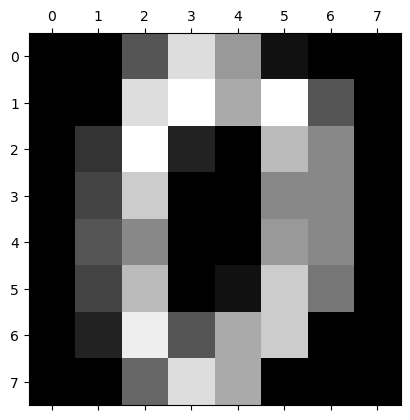

In [4]:
plt.gray()
plt.matshow(X_digits[0].reshape(8,8))
plt.show()

* Séparer les données en train / test
* Entraîner un SVM pour la classification, et calculer ses statistiques
* Essayer plusieurs noyaux pour le SVM, et comparer
* A l'aide d'une technique de cross validation, choisir les paramètres pour le SVM
* Entraîner d'autres algorithmes vus en cours pour la classification, quel est celui qui généralise le mieux ?

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.98        32
           2       0.97      1.00      0.99        39
           3       1.00      0.98      0.99        41
           4       1.00      1.00      1.00        28
           5       1.00      0.97      0.98        31
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        26
           8       0.97      0.95      0.96        37
           9       0.98      1.00      0.99        46

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [9]:
svm_linear = SVC(kernel='poly')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39
           3       1.00      0.98      0.99        41
           4       1.00      1.00      1.00        28
           5       1.00      0.97      0.98        31
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        26
           8       0.97      1.00      0.99        37
           9       0.98      1.00      0.99        46

    accuracy                           0.99       360
   macro avg       1.00      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [10]:
svm_linear = SVC(kernel='sigmoid')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.81      0.81      0.81        32
           2       1.00      0.97      0.99        39
           3       1.00      0.90      0.95        41
           4       0.83      0.89      0.86        28
           5       1.00      0.97      0.98        31
           6       0.97      0.95      0.96        38
           7       0.81      1.00      0.90        26
           8       0.79      0.89      0.84        37
           9       0.95      0.87      0.91        46

    accuracy                           0.92       360
   macro avg       0.91      0.92      0.91       360
weighted avg       0.92      0.92      0.92       360



In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Meilleurs paramètres pour SVM:", grid_search.best_params_)
print("Performance du SVM avec les meilleurs paramètres :")
print(classification_report(y_test, y_pred_best))

Meilleurs paramètres pour SVM: {'C': 10, 'gamma': 0.001}
Performance du SVM avec les meilleurs paramètres :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.98        32
           2       1.00      1.00      1.00        39
           3       1.00      0.98      0.99        41
           4       1.00      1.00      1.00        28
           5       1.00      0.97      0.98        31
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        26
           8       0.97      0.97      0.97        37
           9       0.98      1.00      0.99        46

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


ModuleNotFoundError: No module named 'tensorflow'